In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import matplotlib
font = {'size' : 18}
matplotlib.rc('font', **font)
from scipy.stats import linregress
import sys
sys.path.insert(1, '/disk1/hrb/python/analysis/')

In [2]:
obj = 'calibStars'
ID  = 'uid_s'
# obj = 'qsos'
# ID = 'uid'
band = 'r'
# SSA_band = {'g':'B', 'r':'R', 'i':'I'}[band]

In [3]:
plate_table = pd.read_csv('../../data/surveys/supercosmos/plate_table_full.csv',usecols=['surveyID','raPnt','decPnt'], skiprows=[1])

In [4]:
df = pd.read_csv('../../data/surveys/supercosmos/{}/ssa_secondary_{}_raw.csv'.format(obj,obj), index_col=ID)
duplicates = np.loadtxt('../../data/catalogues/calibStars/duplicate_calibStars.txt', comments='#', dtype='int')
# df['distance'] *= 60 # redefine distance s1o it is in arcsec

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df = df[(df['surveyID']==2) | (df['surveyID']==9)]
df = df[~df.index.isin(duplicates)]
df = df.query('distance<0.0167')
df = df.rename(columns={'smag':'mag'})
df

,distance,mag,surveyID,filterID,mjd
uid_s,,,,,
1,0.003385,20.496,2,OG590,47005.0
1,0.009260,20.397,2,OG590,47404.0
2,0.004084,19.543,2,OG590,47404.0
2,0.007545,19.826,2,OG590,47005.0
6,0.007050,19.042,9,E,34604.0
...,...,...,...,...,...
1006817,0.007979,19.620,2,OG590,47889.0
1006819,0.005710,19.762,9,E,33649.0
1006824,0.009919,20.404,2,OG590,47889.0


In [6]:
p_r1 = np.array([-0.09991162, -0.19239214])
p_r2 = np.array([-0.21768903, -0.15050923])

In [7]:
# from astropy.time import Time
# t = Time(df['epoch'], format='decimalyear')
# df['mjd']=t.mjd

In [8]:
colors = pd.read_csv('../../data/computed/{}/colors_sdss.csv'.format(obj), index_col=0)

In [9]:
pd.options.mode.chained_assignment = None
from funcs.analysis.analysis import *
def reader(n_subarray):
    return pd.read_csv('../../data/merged/{}/{}_band/lc_{}.csv'.format(obj,band,n_subarray), comment='#', nrows=None, index_col = ID, dtype = {'catalogue': np.uint8, 'mag_ps': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})

In [10]:
# Here we load the analysis class. This has various attibutes and methods outlined in /funcs/analysis.py
# Examples:
# Photometry is in dr.df
# Grouped statistics is in dr.grouped
# DR12 VAC properties are in dr.properties
dr = analysis(ID, obj)

In [11]:
dr.read_in(reader, redshift=False)
dr.band = band

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
sdss = dr.df[dr.df['catalogue']==5].groupby(ID).agg({'mag':'mean'}).rename(columns={'mag':'mag_sdss'})
# ps   = dr.df[dr.df['catalogue']==7].groupby(ID).agg({'mag':'mean'}).rename(columns={'mag':'mag_ps'})

In [13]:
df = df.join([sdss,colors])

In [14]:
dfr1 = df[df['surveyID']==9]
dfr2 = df[df['surveyID']==2]


In [15]:
dfr1

,distance,mag,surveyID,filterID,mjd,mag_sdss,mean_gi,mean_gr,mean_ri,mean_iz
uid_s,,,,,,,,,,
6,0.007050,19.042,9,E,34604.0,19.135262,1.350290,0.963248,0.387042,0.254147
16,0.011113,17.124,9,E,34604.0,16.855035,1.016900,0.743110,0.273790,0.167840
19,0.012006,18.944,9,E,34604.0,19.115985,2.304353,1.502386,0.801967,0.458778
28,0.012157,19.281,9,E,34604.0,18.927832,0.819470,0.568420,0.251050,0.115740
33,0.013770,18.134,9,E,34604.0,18.274421,1.850460,1.269970,0.580490,0.414260
...,...,...,...,...,...,...,...,...,...,...
1006790,0.007183,20.322,9,E,33649.0,21.456120,3.694720,1.737800,1.956920,1.125850
1006803,0.009978,19.860,9,E,33649.0,21.035112,1.309880,0.887689,0.422190,0.317082
1006817,0.015038,19.115,9,E,33649.0,20.120352,3.042897,1.809322,1.233576,0.761065


In [16]:
def transform_poly(df, band, band_ssa, color_name, survey, poly_deg, p=None, plot_2dhist=True):
#     qso_color_range = {'gr':(-0.09786, 0.63699), 'ri':(-0.11934, 0.44450), 'iz':(-0.19706, 0.57335)} # why these specific numbers
    qso_color_range = {'ri':(0,0.6)}
    boolean = (df['mag_sdss']<21) & (~df[['mag', 'mean_'+color_name]].isna().any(axis=1)) & (qso_color_range[color_name][0] < df['mean_'+color_name]) & (df['mean_'+color_name] < qso_color_range[color_name][1])
    print('No. qsos that satisfy boolean condition: {:,} / {:,}'.format(boolean.sum(),len(boolean)))
    color, mag_ssa, mag_other = df.loc[boolean, ['mean_'+color_name, 'mag', 'mag_'+survey]].values.T
    offset = mag_ssa - mag_other
    
#     # Snippet below uses scipy so we can quantify the error of the linear fit.
#     m, c, r, p, std_err = linregress(color, offset)
#     print('slope = {:.6f}, intercept = {:.6f}, r^2 = {:.4f}, err = {:.6f}'.format(m,c,r**2,std_err))
#     ssa_transformed = mag_ssa - m*color - c
    
#     mask = (qso_color_range[color_name][0] < color) & (color < qso_color_range[color_name][1])
    if p is None:
        p, res, _, _, _ = np.polyfit(color, offset, deg=poly_deg, full=True)
    print('mag_{} - mag_{}'.format(band_ssa,survey)+' = '+' + '.join(['{:.6f} * x^{:d}'.format(coeff, poly_deg-deg) for deg, coeff in enumerate(p)]))
    ssa_transformed = mag_ssa - np.array([p[poly_deg-i]*color**i for i in range(poly_deg+1)]).sum(axis=0)
    ssa_transformed_full = df['mag'] - np.array([p[poly_deg-i]*df['mean_'+color_name]**i for i in range(poly_deg+1)]).sum(axis=0)
    offset_transformed = ssa_transformed - mag_other

    ssa_transformed_2 = mag_ssa - (-0.0107*color**3 + 0.0050*color**2 - 0.2689*color - 0.1540) # Data from ivezic
    offset_transformed_2 = ssa_transformed_2 - mag_other
    print('std of offset dist. with ivezic transf: {:.4f}'.format(offset_transformed_2.std()))

    
    fig, ax = plt.subplots(1,1, figsize=(16,5))
    
    n, bins, _ = ax.hist(offset_transformed, bins=201, range=(-1,1), alpha=0.4, label='own');
    mode = (bins[n.argmax()]+bins[n.argmax()+1])/2
    n, bins, _ = ax.hist(offset_transformed_2, bins=201, range=(-1,1), alpha=0.4, label='ivezic');

    ax.text(0.02,0.8, 'Post transformation:\nMean = {:.4f}\nStd = {:.4f}\nPeak = {:.4f}'.format(offset_transformed.mean(), offset_transformed.std(), mode), transform=ax.transAxes)
    ax.set(xlabel='{} (transformed) - {}_{}'.format(band_ssa, band, survey))
    ax.axvline(x=mode, color='k',ls='--')
    ax.legend()
    
    if plot_2dhist:
        fig, axes = plt.subplots(1,2, figsize=(16,7))
        axes[0].hist2d(color, offset,             range=[qso_color_range[color_name],[-1,1]], bins=150, cmap=cmap.get_cmap('jet'));
        axes[1].hist2d(color, offset_transformed, range=[qso_color_range[color_name],[-1,1]], bins=150, cmap=cmap.get_cmap('jet'));
        x = np.linspace(0,2,30)
#         axes[0].plot(x,m*x+c, lw=3, ls='--', color='m')
        axes[0].plot(x, sum([p[poly_deg - i]*x**i for i in range(poly_deg+1)]), lw=3, ls='--', color='b', label='Linear fit')
#         axes[0].plot(x, (-0.0107*x**3 + 0.0050*x**2 - 0.2689*x - 0.1540), lw=3, ls='--', color='b', label='ivezic')
        axes[0].axhline(y=0, lw=2, ls='--', color='k')
        axes[1].axhline(y=0, lw=2, ls='--', color='k')
#         axes[0].legend()
        axes[0].set(ylabel=r'$r_\mathrm{PS}-r_\mathrm{SSS}$', xlabel=r'$r-i$')
        axes[1].set(ylabel=r'$r_\mathrm{PS}-r_\mathrm{SSS}^\prime$', xlabel=r'$r-i$')
        fig.subplots_adjust(wspace=0.3)
    return ssa_transformed_full, boolean, p, fig



No. qsos that satisfy boolean condition: 175,536 / 281,696
mag_r1 - mag_sdss = -0.099912 * x^1 + -0.192392 * x^0
std of offset dist. with ivezic transf: 0.2674


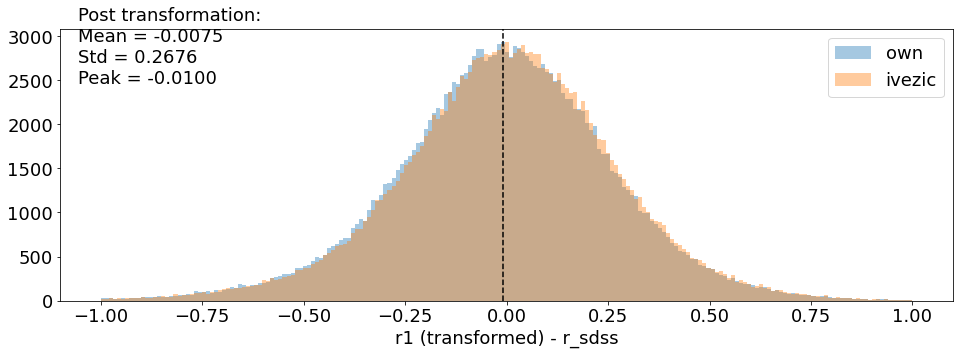

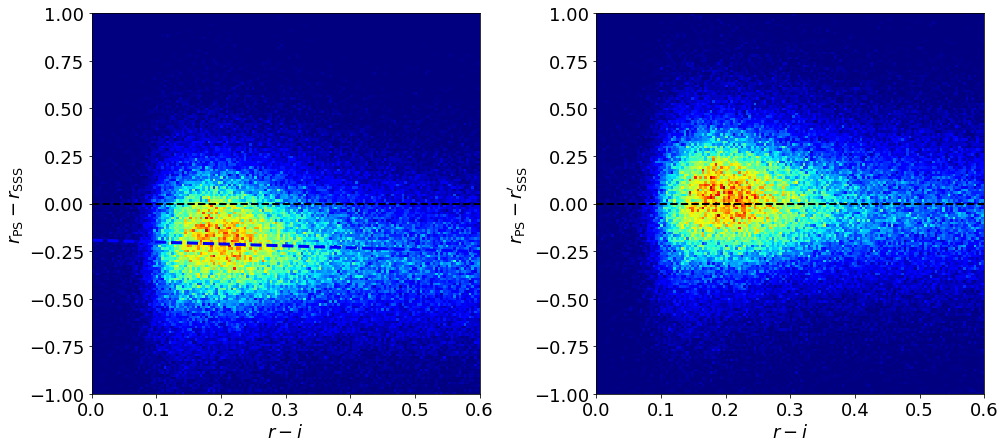

In [17]:
ssa_band = 'r1'
color = 'ri'
survey = 'sdss'
transformed, boolean, coeffs_r1, fig = transform_poly(dfr1, 'r', ssa_band, color, survey, 1, p=p_r1)
dfr1['mag_'+ssa_band+'_'+survey] = transformed
fig.savefig('/disk1/hrb/python/analysis/plots/ssa_transformation_r1.pdf',bbox_inches='tight')

No. qsos that satisfy boolean condition: 313,810 / 591,784
mag_r2 - mag_sdss = -0.197362 * x^1 + -0.154882 * x^0
std of offset dist. with ivezic transf: 0.1563


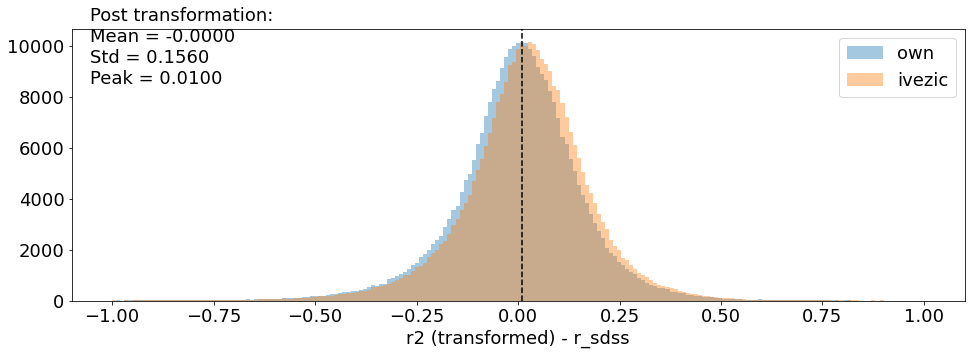

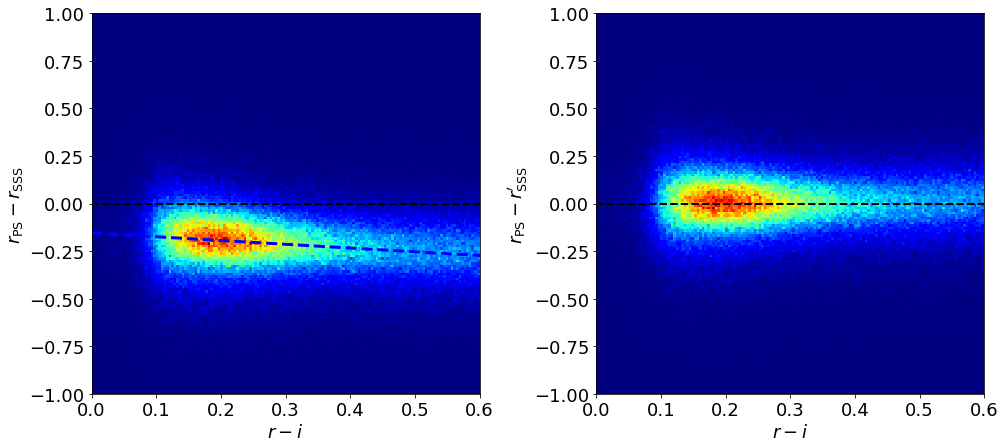

In [18]:
ssa_band = 'r2'
color = 'ri'
survey = 'sdss'
transformed, boolean, coeffs_r2, fig = transform_poly(dfr2, 'r', ssa_band, color, survey, 1, p=None)
dfr2['mag_'+ssa_band+'_'+survey] = transformed
fig.savefig('/disk1/hrb/python/analysis/plots/ssa_transformation_r2.pdf',bbox_inches='tight')

[Text(0.5, 0, 'r2'), Text(0, 0.5, 'r mag (sdss)')]

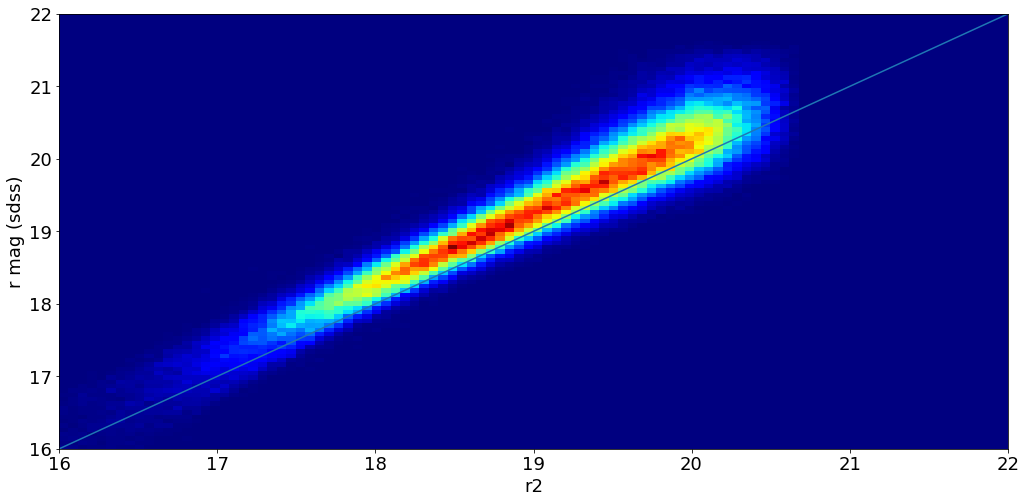

In [19]:
fig, ax = plt.subplots(1,1, figsize=(17,8))
ax.hist2d(*dfr1[['mag','mag_'+survey]].dropna().values.T, bins=[100,100], range=[[16,22],[16,22]], cmap=cmap.get_cmap('jet'));
x = np.linspace(15,22,10)
ax.plot(x,x)
ax.set(xlabel=ssa_band, ylabel='r mag (sdss)')

[Text(0.5, 0, 'r2'), Text(0, 0.5, 'r mag (sdss)')]

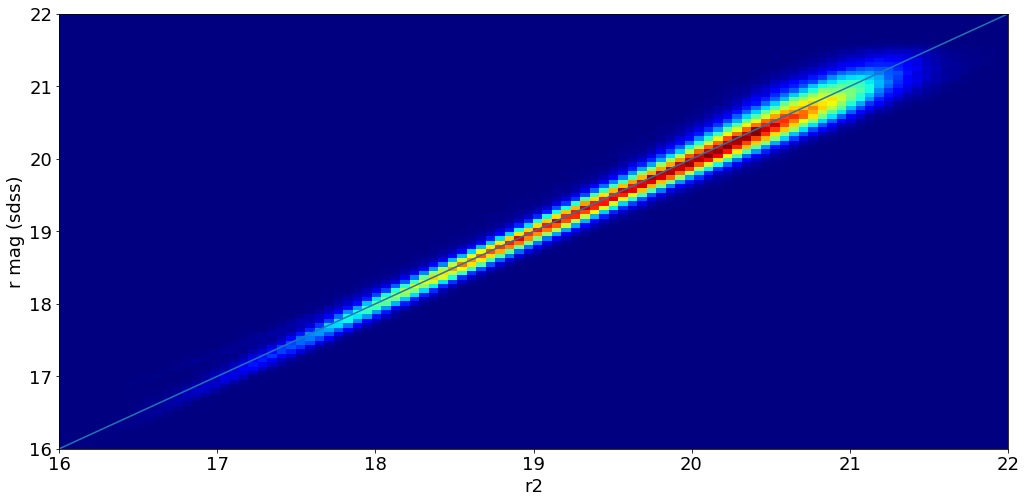

In [20]:
fig, ax = plt.subplots(1,1, figsize=(17,8))
ax.hist2d(*dfr2[['mag_'+ssa_band+'_'+survey,'mag_'+survey]].dropna().values.T, bins=[100,100], range=[[16,22],[16,22]], cmap=cmap.get_cmap('jet'));
x = np.linspace(15,22,10)
ax.plot(x,x)
ax.set(xlabel=ssa_band, ylabel='r mag (sdss)')

In [21]:
dfr1['magerr'] = 0.06751*dfr1['mag'] - 1.08
dfr1['magerr'][dfr1['mag']<18.5] = 0.168935

dfr2['magerr'] = 0.06751*dfr2['mag'] - 1.08
dfr2['magerr'][dfr2['mag']<18.5] = 0.168935

In [22]:
dfr2

,distance,mag,surveyID,filterID,mjd,mag_sdss,mean_gi,mean_gr,mean_ri,mean_iz,mag_r2_sdss,magerr
uid_s,,,,,,,,,,,,
1,0.003385,20.496,2,OG590,47005.0,20.832781,2.201950,1.541440,0.660510,0.263610,20.781242,0.303685
1,0.009260,20.397,2,OG590,47404.0,20.832781,2.201950,1.541440,0.660510,0.263610,20.682242,0.297001
2,0.004084,19.543,2,OG590,47404.0,19.797899,0.966560,0.698950,0.267610,0.089630,19.750699,0.239348
2,0.007545,19.826,2,OG590,47005.0,19.797899,0.966560,0.698950,0.267610,0.089630,20.033699,0.258453
6,0.003536,18.901,2,OG590,47005.0,19.135262,1.350290,0.963248,0.387042,0.254147,19.132270,0.196007
...,...,...,...,...,...,...,...,...,...,...,...,...
1006813,0.008559,19.890,2,OG590,47889.0,20.573099,1.517018,0.990577,0.526442,0.320477,20.148782,0.262774
1006816,0.009003,20.113,2,OG590,47889.0,21.244110,3.213136,1.721972,1.491164,0.879451,20.562182,0.277829
1006817,0.007979,19.620,2,OG590,47889.0,20.120352,3.042897,1.809322,1.233576,0.761065,20.018344,0.244546


In [23]:
dfr1 = dfr1[['mag_r1_sdss','mjd','magerr']].dropna().rename(columns={'mag_r1_sdss':'mag'})
dfr1['catalogue'] = 1

dfr2 = dfr2[['mag_r2_sdss','mjd','magerr']].dropna().rename(columns={'mag_r2_sdss':'mag'})
dfr2['catalogue'] = 3

In [24]:
# Save intermediate step
# dfr1.append(dfr2).sort_values(['uid_s','mjd']).to_csv('/disk1/hrb/python/data/surveys/supercosmos/qsos/ssa_secondary.csv')


In [25]:
dr.df = dr.df.append([dfr1, dfr2])
dr.df.index = dr.df.index.astype('int')
dr.df = dr.df.sort_values([ID,'mjd'])

In [26]:
dr.df

,catalogue,mjd,mag,magerr
uid_s,,,,
1,3,47005.000000,20.781242,0.303685
1,3,47404.000000,20.682242,0.297001
1,5,51465.129240,20.773518,0.054754
1,5,52053.425802,20.900522,0.055713
1,5,52172.226094,20.817713,0.035777
...,...,...,...,...
1006847,5,53294.463412,20.104103,0.025892
1006847,5,53298.460012,20.084713,0.026922
1006847,5,53312.366967,20.174818,0.038362


In [ ]:
def save(args):
    i, chunk = args
    f = open('/disk1/hrb/python/data/merged/{}/{}_band/with_ssa/lc_{}.csv'.format(obj,band,i), 'w') # 'w' argument will overwrite
    comment = '# CSV of cleaned photometry with plate observations\n'
    f.write(comment)
    chunk.to_csv(f)
    
# multiprocesssor
chunks = np.array_split(dr.df,4)
if __name__ == '__main__':
    pool = Pool(4)
    pool.map(save, enumerate(chunks))

In [ ]:
dr.df['catalogue'].unique()

In [ ]:
def calculate_transform(df):
    key = 'R1-r_ps'
    m, c, r, p, std_err = linregress(df[['mean_gr',key]].dropna())
    print('slope = {:.4f}, intercept = {:.4f}, r^2 = {:.4f}, err = {:.6f}'.format(m,c,r**2,std_err))
    return m, c, std_err

In [ ]:
ms = []
cs = []
errs = []
edges = np.arange(16,20.5,.5)
centres = (edges[:-1]+edges[1:])/2
for lower, upper in zip(edges[:-1],edges[1:]):
    print('{}<mag<{}'.format(lower,upper))
    m,c,err = calculate_transform(df.query('{}<mag_sdss<{}'.format(lower,upper)))
    ms.append(m)
    cs.append(c)
    errs.append(err)
# print('mag>21.75')
# m,c,err = calculate_transform(df.query('mag_sdss>21.75'))
# ms.append(m)
# cs.append(c)
# errs.append(err)

In [ ]:
(df['mag_sdss']<20).sum()/len(df)

In [ ]:
plt.errorbar(centres,cs, yerr=errs)
m, c, r, p, std_err = linregress(centres, cs)
x = np.linspace(16,20,10)
plt.plot(x,m*x+c)

In [ ]:
plt.errorbar(centres, ms, yerr=errs)

In [ ]:
(df['R1-r_ps']**2).mean()

# Check magerr distribution

In [ ]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
from multiprocessing import Pool
# from profilestats import profile
import sys
sys.path.append('../')
from scipy.stats import binned_statistic
from funcs.analysis.analysis import *
%matplotlib inline

def reader(n_subarray):
    return pd.read_csv('../../data/merged/{}/r_band/with_ssa/lc_{}.csv'.format(obj,n_subarray), comment='#', index_col = ID, dtype = {'catalogue': np.uint8, 'mag': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})

In [ ]:
obj = 'qsos'
ID  = 'uid'
band = 'r'
redshift_bool = True
dr = analysis(ID, obj)

In [ ]:
dr.read_in(reader, redshift=redshift_bool)
dr.band = band
# dr.group(keys = ['uid'],read_in=True, redshift=redshift_bool, survey = 'SSS')

In [ ]:
dr.df.catalogue.unique()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
catalogue_dict = {1:'sss_r1', 3:'sss_r2', 5:'sdss', 7:'ps', 11:'ztf'}
for surveyID in [1,3,5,7,11]:
    dr.df.loc[dr.df['catalogue']==surveyID, 'magerr'].hist(bins=100, ax=ax, alpha=0.3, label=catalogue_dict[surveyID], density=True)
    
ax.legend()
ax.set(ylim=[0,30])

In [ ]:
### 